In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of Random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key



In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9f1fcccc084e9c4d3d01850c2920c40


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | xiaoweizhai
Processing Record 4 of Set 1 | flinders
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | olafsvik
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | sao filipe
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | sibolga
Processing Record 17 of Set 1 | semenivka
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | puer

Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | fort nelson
Processing Record 43 of Set 4 | bundaberg
Processing Record 44 of Set 4 | thinadhoo
Processing Record 45 of Set 4 | ketchikan
Processing Record 46 of Set 4 | teterow
Processing Record 47 of Set 4 | chisinau
Processing Record 48 of Set 4 | shelburne
Processing Record 49 of Set 4 | chuy
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | chapais
Processing Record 2 of Set 5 | weiser
Processing Record 3 of Set 5 | tazovskiy
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 5 | hirara
Processing Record 7 of Set 5 | broome
Processing Record 8 of Set 5 | port lincoln
Processing Record 9 of Set 5 | provideniya
Processing Record 10 of Set 5 | inuvik
Processing Record 11 of Set 5 | lexington
Processing Record 12 of Set 5 | san policarpo
Processing Record 13 of Set 5 | ilulissat
Processin

Processing Record 24 of Set 8 | waitara
Processing Record 25 of Set 8 | vostok
Processing Record 26 of Set 8 | trairi
Processing Record 27 of Set 8 | mga
Processing Record 28 of Set 8 | kalmunai
Processing Record 29 of Set 8 | guacheta
Processing Record 30 of Set 8 | jubayl
City not found. Skipping...
Processing Record 31 of Set 8 | strezhevoy
Processing Record 32 of Set 8 | tuatapere
Processing Record 33 of Set 8 | babanusah
City not found. Skipping...
Processing Record 34 of Set 8 | bria
Processing Record 35 of Set 8 | mezen
Processing Record 36 of Set 8 | australind
Processing Record 37 of Set 8 | sinnamary
Processing Record 38 of Set 8 | ahuimanu
Processing Record 39 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 40 of Set 8 | jalu
Processing Record 41 of Set 8 | avera
Processing Record 42 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 43 of Set 8 | akdepe
Processing Record 44 of Set 8 | burica
City not found. Skipping...
Processing Record 

Processing Record 14 of Set 12 | verkhoyansk
Processing Record 15 of Set 12 | mbandaka
Processing Record 16 of Set 12 | aligudarz
Processing Record 17 of Set 12 | warqla
City not found. Skipping...
Processing Record 18 of Set 12 | alta floresta
Processing Record 19 of Set 12 | vao
Processing Record 20 of Set 12 | maldonado
Processing Record 21 of Set 12 | chilliwack
Processing Record 22 of Set 12 | beyneu
Processing Record 23 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 24 of Set 12 | matagami
Processing Record 25 of Set 12 | lichuan
Processing Record 26 of Set 12 | bari
Processing Record 27 of Set 12 | springbok
Processing Record 28 of Set 12 | loandjili
Processing Record 29 of Set 12 | penzance
Processing Record 30 of Set 12 | soe
Processing Record 31 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 32 of Set 12 | puerto el triunfo
Processing Record 33 of Set 12 | shenjiamen
Processing Record 34 of Set 12 | taft
Processing Record 35 of Set 12 | yaan
Pro

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.46,-71.14,82.11,77,100,15.37,TC,2020-11-04 05:01:39
1,Yellowknife,62.46,-114.35,6.80,84,90,9.17,CA,2020-11-04 04:59:25
2,Xiaoweizhai,26.19,107.51,56.37,61,98,2.89,CN,2020-11-04 05:02:25
3,Flinders,-34.58,150.86,77.00,66,76,4.00,AU,2020-11-04 04:59:49
4,Jamestown,42.10,-79.24,44.01,69,1,8.05,US,2020-11-04 05:02:10
5,Vila Velha,-20.33,-40.29,68.00,82,75,3.36,BR,2020-11-04 05:02:25
6,Constitucion,-35.33,-72.42,54.00,67,10,10.31,CL,2020-11-04 05:02:25
7,Kapaa,22.08,-159.32,78.80,88,75,12.75,US,2020-11-04 04:58:03
8,Hobart,-42.88,147.33,68.00,34,0,21.92,AU,2020-11-04 05:02:02
9,Olafsvik,64.89,-23.71,46.49,95,100,24.83,IS,2020-11-04 04:59:09


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cockburn Town,TC,2020-11-04 05:01:39,21.46,-71.14,82.11,77,100,15.37
1,Yellowknife,CA,2020-11-04 04:59:25,62.46,-114.35,6.80,84,90,9.17
2,Xiaoweizhai,CN,2020-11-04 05:02:25,26.19,107.51,56.37,61,98,2.89
3,Flinders,AU,2020-11-04 04:59:49,-34.58,150.86,77.00,66,76,4.00
4,Jamestown,US,2020-11-04 05:02:10,42.10,-79.24,44.01,69,1,8.05
...,...,...,...,...,...,...,...,...,...
544,Tangshan,CN,2020-11-04 05:03:34,39.63,118.18,58.86,31,0,10.63
545,Manta,EC,2020-11-04 05:01:14,-0.95,-80.73,71.60,83,40,6.93
546,Chicama,PE,2020-11-04 04:57:56,-7.84,-79.15,60.37,84,15,2.51
547,North Bend,US,2020-11-04 04:56:00,43.41,-124.22,60.80,82,90,8.05


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
today = time.strftime("%x")
today

'11/04/20'

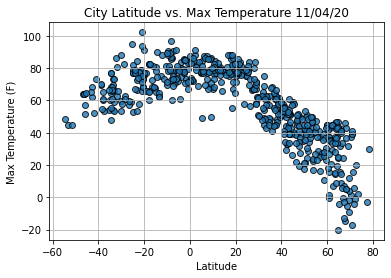

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

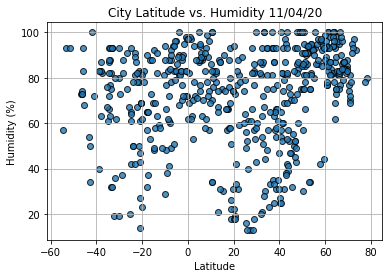

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

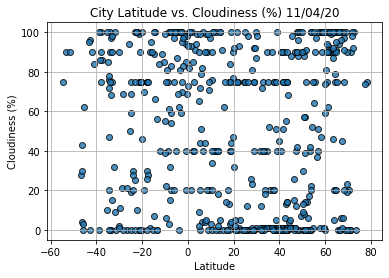

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

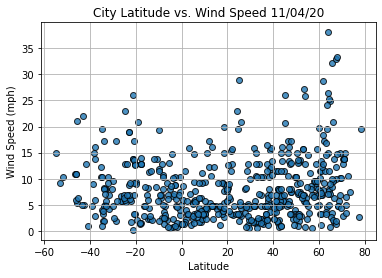

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()